In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#importing dataset
data = pd.read_csv("/content/cassava_yields.csv")

In [8]:
data

,Entity,Code,Year,Cassava | 00000125 || Yield | 005412 || tonnes per hectare
0,Africa,NaN,1961,5.660333
1,Africa,NaN,1962,5.659727
2,Africa,NaN,1963,5.715676
3,Africa,NaN,1964,5.746767
4,Africa,NaN,1965,5.901356
...,...,...,...,...
8136,Zimbabwe,ZWE,2019,4.785201
8137,Zimbabwe,ZWE,2020,4.761701
8138,Zimbabwe,ZWE,2021,4.770001
8139,Zimbabwe,ZWE,2022,4.772300


In [12]:
data.head()

,Entity,Code,Year,Cassava | 00000125 || Yield | 005412 || tonnes per hectare
0,Africa,NaN,1961,5.660333
1,Africa,NaN,1962,5.659727
2,Africa,NaN,1963,5.715676
3,Africa,NaN,1964,5.746767
4,Africa,NaN,1965,5.901356


In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8141 entries, 0 to 8140
Data columns (total 4 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Entity                                                      8141 non-null   object 
 1   Code                                                        6246 non-null   object 
 2   Year                                                        8141 non-null   int64  
 3   Cassava | 00000125 || Yield | 005412 || tonnes per hectare  8141 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 254.5+ KB
None


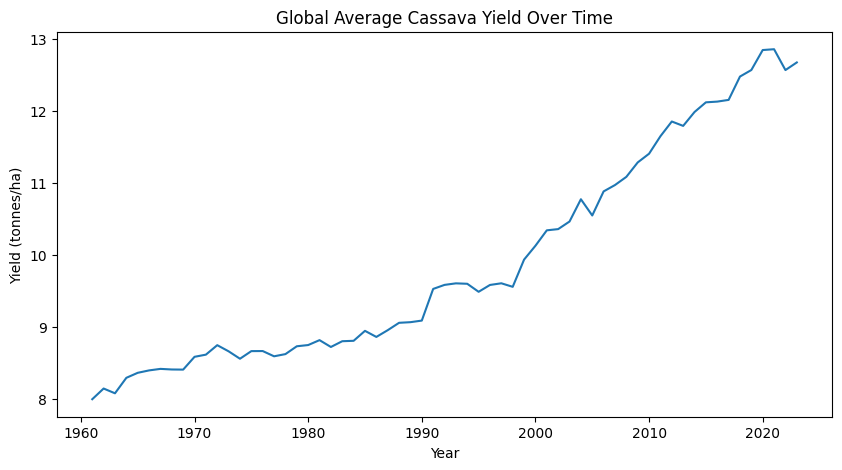

<Figure size 640x480 with 0 Axes>

In [16]:
# global trend of cassava yield over time (average yield per year)
global_cassava_yield_trend = data.groupby("Year")["Cassava | 00000125 || Yield | 005412 || tonnes per hectare"].mean()
plt.figure(figsize=(10, 5))
plt.plot(global_cassava_yield_trend.index, global_cassava_yield_trend.values)
plt.title("Global Average Cassava Yield Over Time")
plt.xlabel("Year")
plt.ylabel("Yield (tonnes/ha)")
plt.show()
plt.savefig("global_cassava_yield_trend.png")

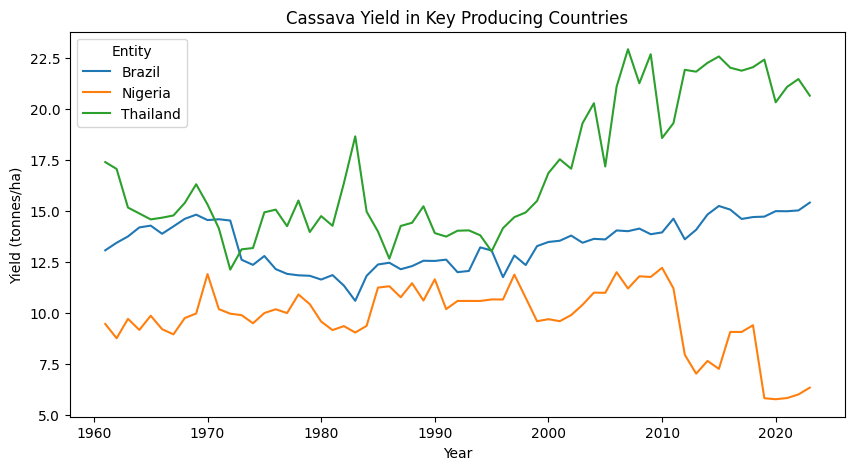

<Figure size 640x480 with 0 Axes>

In [18]:
# country level comparison (example: Nigeria, Brazil, Thailand)
countries = ["Nigeria", "Brazil", "Thailand"]
subset = data[data["Entity"].isin(countries)]
plt.figure(figsize=(10, 5))
sns.lineplot(data=subset, x="Year", y="Cassava | 00000125 || Yield | 005412 || tonnes per hectare", hue="Entity")
plt.title("Cassava Yield in Key Producing Countries")
plt.xlabel("Year")
plt.ylabel("Yield (tonnes/ha)")
plt.show()
plt.savefig("Cassava Yield in Key Producing Countries.png")

In [19]:
# Identify top performers by year
top_performers = data[data["Year"] == 2020].sort_values(by="Cassava | 00000125 || Yield | 005412 || tonnes per hectare", ascending=False).head(10)
print(top_performers)

                                Entity Code  Year  \
3291                            Guyana  GUY  2020   
3543                             India  IND  2020   
7076               Southern Asia (FAO)  NaN  2020   
8074                            Zambia  ZMB  2020   
3858                              Laos  LAO  2020   
5206                             Niger  NER  2020   
6248  Saint Vincent and the Grenadines  VCT  2020   
7253                          Suriname  SUR  2020   
3606                         Indonesia  IDN  2020   
563                            Bahamas  BHS  2020   

      Cassava | 00000125 || Yield | 005412 || tonnes per hectare  
3291                                          47.582603           
3543                                          35.028900           
7076                                          32.893303           
8074                                          32.644600           
3858                                          32.056503           
5206          

In [20]:
# Calculate CAGR(Compound Annual Growth Rate) for each country
def CAGR(start, end, years):
    return ((end/start)**(1/years) - 1) * 100

cagr_results = []
for country in data["Entity"].unique():
    country_data = data[data["Entity"] == country]
    start = country_data.iloc[0]["Cassava | 00000125 || Yield | 005412 || tonnes per hectare"]
    end = country_data.iloc[-1]["Cassava | 00000125 || Yield | 005412 || tonnes per hectare"]
    years = country_data.iloc[-1]["Year"] - country_data.iloc[0]["Year"]
    if start > 0 and years > 0:
        cagr_results.append((country, CAGR(start, end, years)))

cagr_df = pd.DataFrame(cagr_results, columns=["Country", "CAGR (%)"])
print(cagr_df.sort_values(by="CAGR (%)", ascending=False).head(10))

                 Country  CAGR (%)
54                Guyana  3.652229
108         Sierra Leone  2.958747
58                 India  2.622494
115          South Sudan  2.597633
117  Southern Asia (FAO)  2.498825
85             Nicaragua  2.133599
11                 Benin  2.070225
106              Senegal  2.065324
86                 Niger  2.054543
59             Indonesia  2.045384


In [21]:
display(cagr_df.describe())

,CAGR (%)
count,136.000000
mean,0.593152
std,1.064923
min,-3.949383
25%,0.076946
50%,0.572771
75%,1.220889
max,3.652229


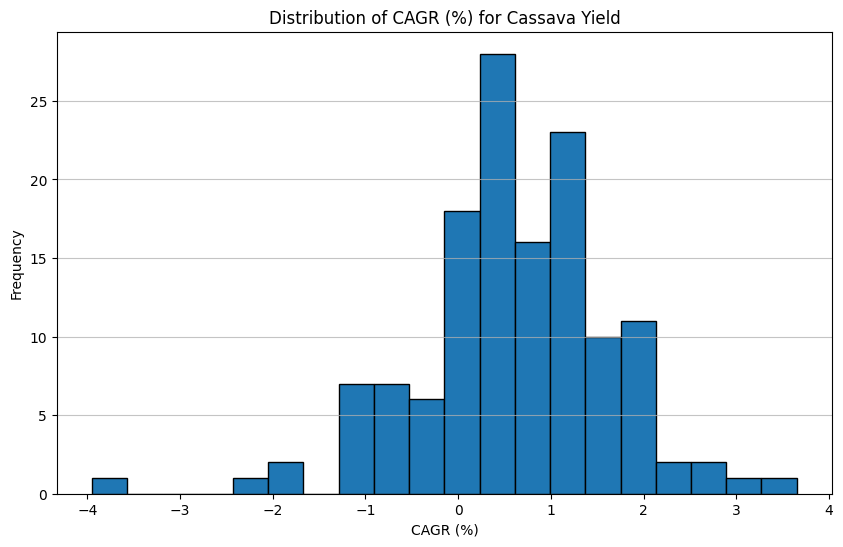

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(cagr_df["CAGR (%)"], bins=20, edgecolor='black')
plt.title("Distribution of CAGR (%) for Cassava Yield")
plt.xlabel("CAGR (%)")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()
plt.savefig("Distribution of CAGR (%) for Cassava Yield")

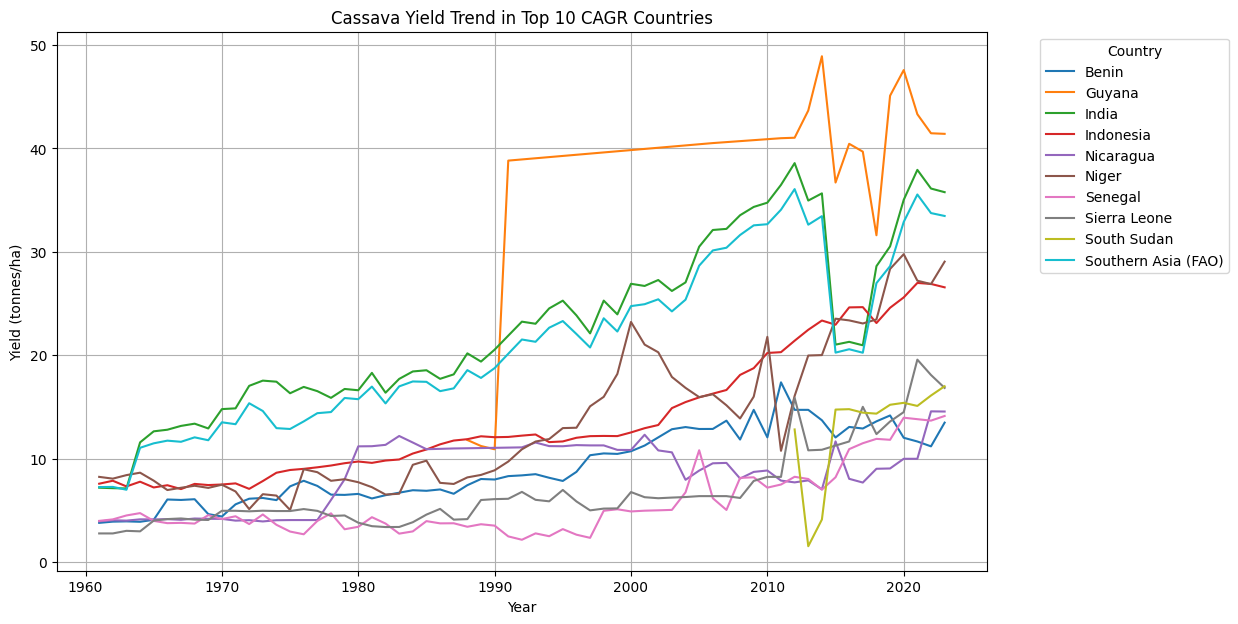

<Figure size 640x480 with 0 Axes>

In [24]:
top_cagr_countries = cagr_df.sort_values(by="CAGR (%)", ascending=False).head(10)["Country"].tolist()
subset_top_cagr = data[data["Entity"].isin(top_cagr_countries)]

plt.figure(figsize=(12, 7))
sns.lineplot(data=subset_top_cagr, x="Year", y="Cassava | 00000125 || Yield | 005412 || tonnes per hectare", hue="Entity")
plt.title("Cassava Yield Trend in Top 10 CAGR Countries")
plt.xlabel("Year")
plt.ylabel("Yield (tonnes/ha)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
plt.savefig("Cassava Yield Trend in Top 10 CAGR Countries.png")

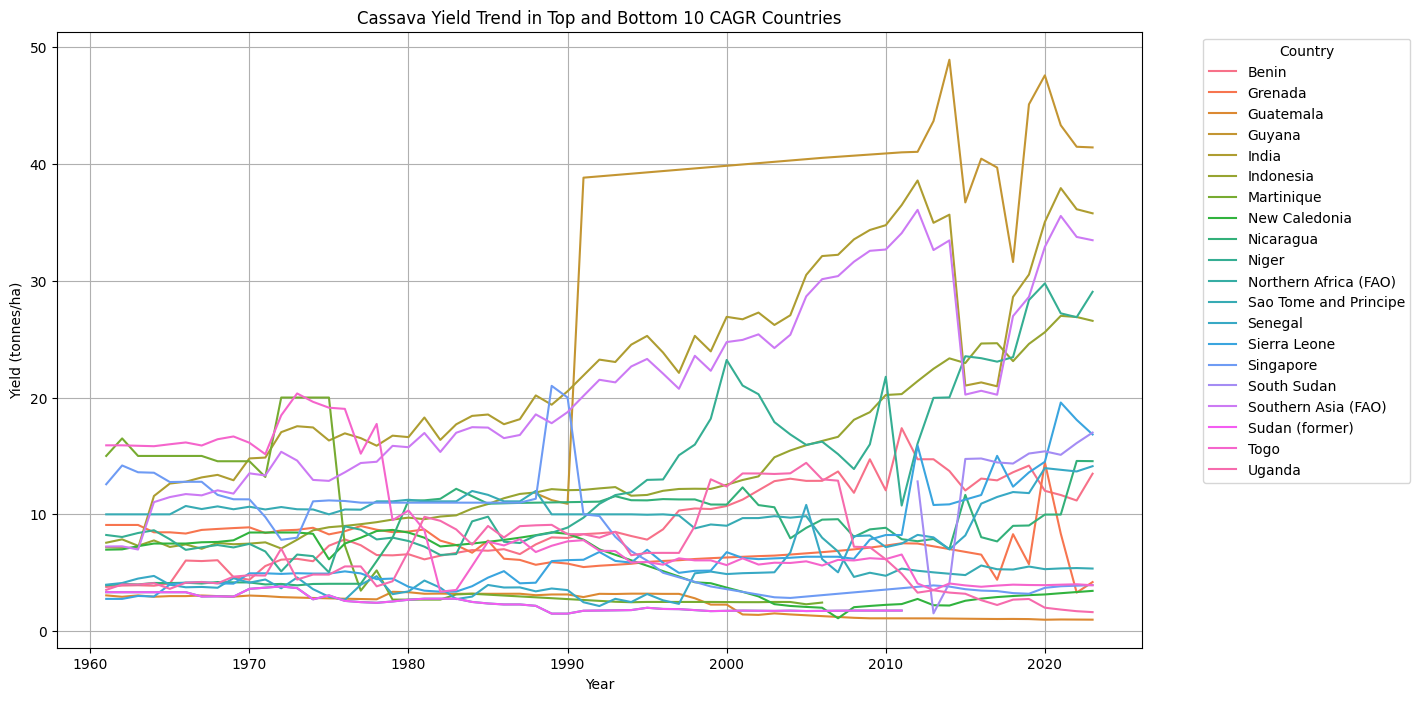

<Figure size 640x480 with 0 Axes>

In [25]:
bottom_cagr_countries = cagr_df.sort_values(by="CAGR (%)", ascending=True).head(10)["Country"].tolist()
top_and_bottom_cagr_countries = top_cagr_countries + bottom_cagr_countries
subset_top_and_bottom_cagr = data[data["Entity"].isin(top_and_bottom_cagr_countries)]

plt.figure(figsize=(14, 8))
sns.lineplot(data=subset_top_and_bottom_cagr, x="Year", y="Cassava | 00000125 || Yield | 005412 || tonnes per hectare", hue="Entity")
plt.title("Cassava Yield Trend in Top and Bottom 10 CAGR Countries")
plt.xlabel("Year")
plt.ylabel("Yield (tonnes/ha)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
plt.savefig("Cassava Yield Trend in Top and Bottom 10 CAGR Countries.png")

In [ ]:
display(cagr_df.sort_values(by="CAGR (%)", ascending=False).head(10))

,Country,CAGR (%)
54,Guyana,3.652229
108,Sierra Leone,2.958747
58,India,2.622494
115,South Sudan,2.597633
117,Southern Asia (FAO),2.498825
85,Nicaragua,2.133599
11,Benin,2.070225
106,Senegal,2.065324
86,Niger,2.054543
59,Indonesia,2.045384
